<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Deep-Neural-Network/blob/main/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The key innovation on the inception models is called the inception module. This is a block of parallel convolutional layers with different sized filters (e.g. 1×1, 3×3, 5×5) and a 3×3 max pooling layer, the results of which are then concatenated
#A problem with a naive implementation of the inception model is that the number of filters (depth or channels) begins to build up fast, especially when inception modules are stacked.
#Performing convolutions with larger filter sizes (e.g. 3 and 5) can be computationally expensive on a large number of filters. To address this, 1×1 convolutional layers are used to reduce the number of filters in the inception model. Specifically before the 3×3 and 5×5 convolutional layers and after the pooling layer.

In [3]:
# creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate #for inception 
from keras.utils import plot_model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  256         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 12  3584        ['input_1[0][0]']                
                                8)                                                            

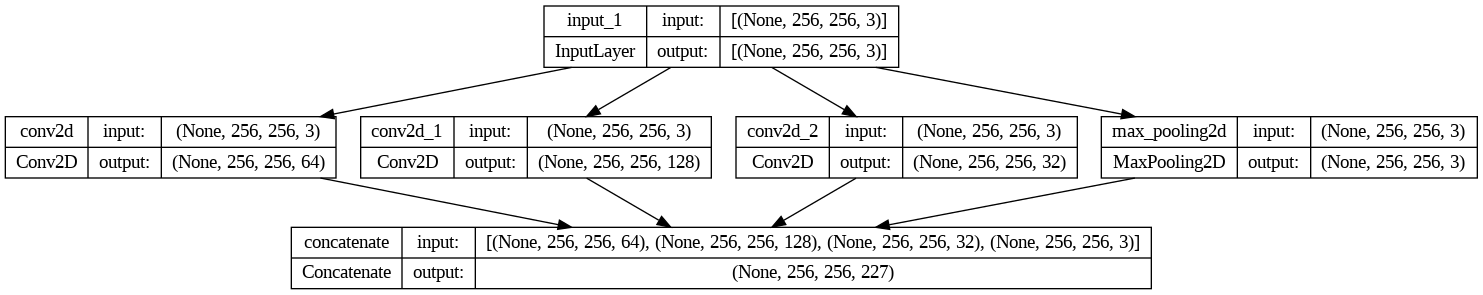

In [4]:
# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3): #f1, f2, f3 mean filter1 ,filter2 ,filyter3
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv
  conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
  # 5x5 conv
  conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in) #strides=(1,1) new in inception
  
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1) #to add all blocks in one block
  return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 256, 256, 96  384         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 256, 256, 16  64          ['input_2[0][0]']                
                                )                                                           

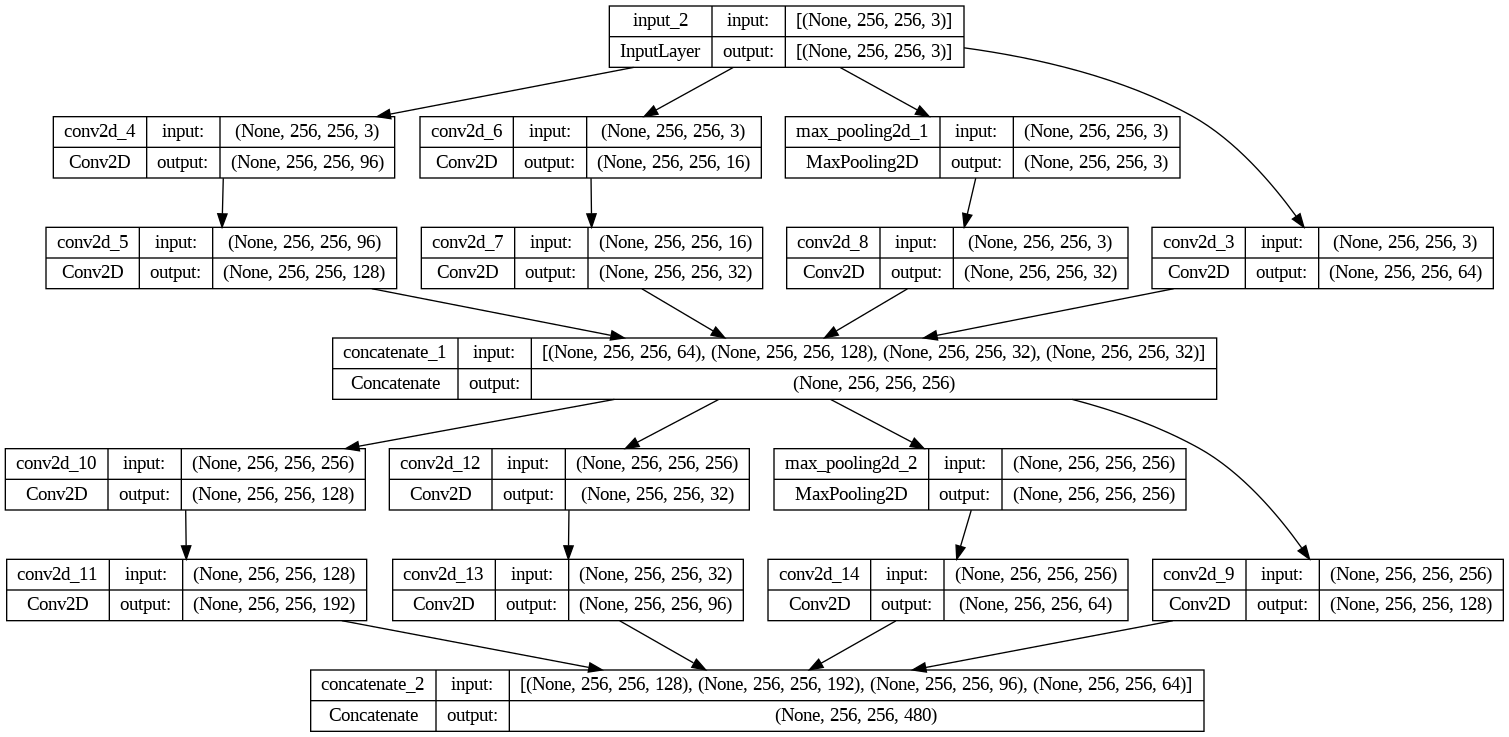

In [5]:
# function for creating a projected inception module better than naive
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv use 2 convolution instead of 1
  conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
  conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
  # 5x5 conv use 2 convolution instead of 1
  conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
  conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
  # 3x3 max pooling cuz of 2 convolution layers we need 2 pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32) #increased num of filters 
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)

# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()

# plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')